In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules 

In [2]:
data = pd.read_csv('bread basket (1).csv')
data.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [3]:
data.shape

(20507, 5)

In [4]:
data.isnull().sum()

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [6]:
data.describe()

C:\Users\Harshil Shah\anaconda3\lib\site-packages\pandas\core\algorithms.py:517: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type(
C:\Users\Harshil Shah\anaconda3\lib\site-packages\pandas\core\array_algos\quantile.py:100: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  result = nanpercentile(


,Transaction
count,20507.000000
mean,4976.202370
std,2796.203001
min,1.000000
25%,2552.000000
50%,5137.000000
75%,7357.000000
max,9684.000000


In [7]:
data['date_time'] = pd.to_datetime(data['date_time'])

In [8]:
data['month'] = data['date_time'].dt.month
data['hour'] = data['date_time'].dt.hour
data['weekday'] = data['date_time'].dt.weekday
data['date'] = data['date_time'].dt.day

In [9]:
data.head()

,Transaction,Item,date_time,period_day,weekday_weekend,month,hour,weekday,date
0,1,Bread,2016-10-30 09:58:00,morning,weekend,10,9,6,30
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,10,6,30
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,10,6,30
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10,10,6,30
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10,10,6,30


In [10]:
data['weekday'] = data['weekday'].replace((0,1,2,3,4,5,6),
                                          ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))

C:\Users\Harshil Shah\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1846: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])  # type: ignore[arg-type]


In [11]:
data['month'] = data['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12),
                                          ('January','February','March','April','May','June','July','August',
                                          'September','October','November','December'))

C:\Users\Harshil Shah\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1846: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])  # type: ignore[arg-type]


In [12]:
data.month.unique()

array(['October', 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'November', 'December'],
      dtype=object)

In [13]:
data.head()

,Transaction,Item,date_time,period_day,weekday_weekend,month,hour,weekday,date
0,1,Bread,2016-10-30 09:58:00,morning,weekend,October,9,Sunday,30
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,October,10,Sunday,30
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,October,10,Sunday,30
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,October,10,Sunday,30
4,3,Jam,2016-10-30 10:07:00,morning,weekend,October,10,Sunday,30


In [14]:
data['Item'] = data['Item'].str.strip()
data['Item'] = data['Item'].str.lower()

In [15]:
data.head()

,Transaction,Item,date_time,period_day,weekday_weekend,month,hour,weekday,date
0,1,bread,2016-10-30 09:58:00,morning,weekend,October,9,Sunday,30
1,2,scandinavian,2016-10-30 10:05:00,morning,weekend,October,10,Sunday,30
2,2,scandinavian,2016-10-30 10:05:00,morning,weekend,October,10,Sunday,30
3,3,hot chocolate,2016-10-30 10:07:00,morning,weekend,October,10,Sunday,30
4,3,jam,2016-10-30 10:07:00,morning,weekend,October,10,Sunday,30


In [16]:
import seaborn as sns

C:\Users\Harshil Shah\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


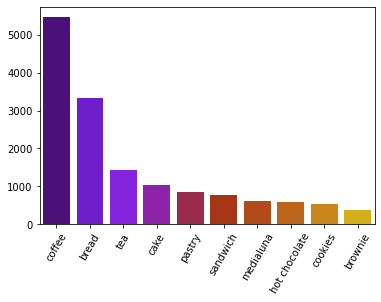

In [17]:
sns.barplot(x=data.Item.value_counts().head(10).index,y=data.Item.value_counts().head(10).values,palette='gnuplot')
plt.xticks(rotation=60)
plt.show()

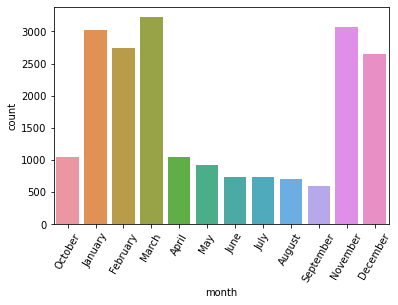

In [18]:
sns.countplot(x=data['month'])
plt.xticks(rotation=60)
plt.show()

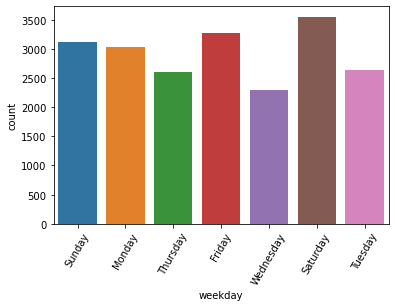

In [19]:
sns.countplot(x=data['weekday'])
plt.xticks(rotation=60)
plt.show()

In [20]:
x = data.groupby(['Transaction','Item'])['Item'].count()
x

Transaction  Item         
1            bread            1
2            scandinavian     2
3            cookies          1
             hot chocolate    1
             jam              1
                             ..
9682         tacos/fajita     1
             tea              1
9683         coffee           1
             pastry           1
9684         smoothies        1
Name: Item, Length: 18887, dtype: int64

In [21]:
tdf = data.groupby(['Transaction','Item'])['Item'].count().reset_index(name='Count')

In [22]:
tdf

,Transaction,Item,Count
0,1,bread,1
1,2,scandinavian,2
2,3,cookies,1
3,3,hot chocolate,1
4,3,jam,1
...,...,...,...
18882,9682,tacos/fajita,1
18883,9682,tea,1
18884,9683,coffee,1
18885,9683,pastry,1


In [24]:
my_basket = tdf.pivot_table(index='Transaction',columns='Item',values = 'Count',aggfunc='sum').fillna(0)
my_basket

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
def encode(x):
    if x<=0:
        return 0
    if x>=1:
        return 1
    
my_basket_sets = my_basket.applymap(encode)

In [27]:
my_basket_sets

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
frequent_items= apriori(my_basket_sets,min_support=0.01,use_colnames=True)
frequent_items

C:\Users\Harshil Shah\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.036344,(alfajores)
1,0.016059,(baguette)
2,0.327205,(bread)
3,0.040042,(brownie)
4,0.103856,(cake)
...,...,...
56,0.023666,"(coffee, toast)"
57,0.014369,"(sandwich, tea)"
58,0.010037,"(coffee, bread, cake)"
59,0.011199,"(coffee, pastry, bread)"


In [34]:
rules = association_rules(frequent_items,metric='lift',min_threshold=1)

In [36]:
rules.sort_values('confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
31,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
29,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235,0.204851
18,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
23,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
1,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
17,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
25,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
7,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
27,(scone),(coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366,0.088224
13,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
